--> Running various ML models on the same dataset

In [1]:
from math import sqrt

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
data_ = pd.read_csv('MaunaLoaDailyTemps.csv')

data_

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758
...,...,...,...,...,...,...
1820,12/26/2018,35.0,45.0,40.0,654,1752
1821,12/27/2018,33.0,44.0,39.0,655,1752
1822,12/28/2018,33.0,47.0,40.0,655,1753
1823,12/29/2018,36.0,47.0,42.0,655,1753


In [3]:
data_['DATE'] = pd.to_datetime(data_['DATE'])

data = data_[['DATE', 'AvgTemp']]

data = data.reset_index(drop=True)

In [4]:
data

,DATE,AvgTemp
0,2014-01-01,40.0
1,2014-01-02,43.0
2,2014-01-03,41.0
3,2014-01-04,37.0
4,2014-01-05,31.0
...,...,...
1820,2018-12-26,40.0
1821,2018-12-27,39.0
1822,2018-12-28,40.0
1823,2018-12-29,42.0


<Axes: >

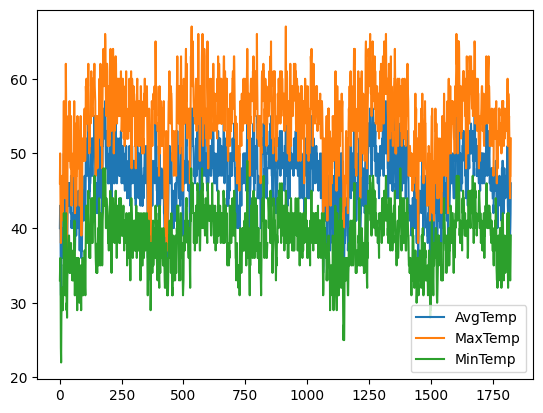

In [5]:
data_[['AvgTemp', 'MaxTemp', 'MinTemp']].plot()

In [6]:
def create_features(data, target_col, n_lags=12):

    df = data.copy()
    for lag in range(1, n_lags + 1):
        df[f'lag_{lag}'] = df[target_col].shift(lag)

    return df.dropna()

In [7]:
supervised_data = create_features(data, target_col='AvgTemp', n_lags=20)

supervised_data

,DATE,AvgTemp,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20
20,2014-01-21,48.0,45.0,44.0,46.0,50.0,45.0,43.0,39.0,36.0,...,39.0,36.0,36.0,37.0,31.0,31.0,37.0,41.0,43.0,40.0
21,2014-01-22,38.0,48.0,45.0,44.0,46.0,50.0,45.0,43.0,39.0,...,40.0,39.0,36.0,36.0,37.0,31.0,31.0,37.0,41.0,43.0
22,2014-01-23,39.0,38.0,48.0,45.0,44.0,46.0,50.0,45.0,43.0,...,39.0,40.0,39.0,36.0,36.0,37.0,31.0,31.0,37.0,41.0
23,2014-01-24,47.0,39.0,38.0,48.0,45.0,44.0,46.0,50.0,45.0,...,36.0,39.0,40.0,39.0,36.0,36.0,37.0,31.0,31.0,37.0
24,2014-01-25,52.0,47.0,39.0,38.0,48.0,45.0,44.0,46.0,50.0,...,39.0,36.0,39.0,40.0,39.0,36.0,36.0,37.0,31.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2018-12-26,40.0,42.0,44.0,47.0,47.0,50.0,48.0,42.0,43.0,...,47.0,46.0,45.0,47.0,47.0,46.0,45.0,44.0,45.0,44.0
1821,2018-12-27,39.0,40.0,42.0,44.0,47.0,47.0,50.0,48.0,42.0,...,49.0,47.0,46.0,45.0,47.0,47.0,46.0,45.0,44.0,45.0
1822,2018-12-28,40.0,39.0,40.0,42.0,44.0,47.0,47.0,50.0,48.0,...,51.0,49.0,47.0,46.0,45.0,47.0,47.0,46.0,45.0,44.0
1823,2018-12-29,42.0,40.0,39.0,40.0,42.0,44.0,47.0,47.0,50.0,...,43.0,51.0,49.0,47.0,46.0,45.0,47.0,47.0,46.0,45.0


In [8]:
X = supervised_data.drop(columns=['AvgTemp'])
Y = supervised_data['AvgTemp']

print(X, Y)

           DATE  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7  lag_8  \
20   2014-01-21   45.0   44.0   46.0   50.0   45.0   43.0   39.0   36.0   
21   2014-01-22   48.0   45.0   44.0   46.0   50.0   45.0   43.0   39.0   
22   2014-01-23   38.0   48.0   45.0   44.0   46.0   50.0   45.0   43.0   
23   2014-01-24   39.0   38.0   48.0   45.0   44.0   46.0   50.0   45.0   
24   2014-01-25   47.0   39.0   38.0   48.0   45.0   44.0   46.0   50.0   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
1820 2018-12-26   42.0   44.0   47.0   47.0   50.0   48.0   42.0   43.0   
1821 2018-12-27   40.0   42.0   44.0   47.0   47.0   50.0   48.0   42.0   
1822 2018-12-28   39.0   40.0   42.0   44.0   47.0   47.0   50.0   48.0   
1823 2018-12-29   40.0   39.0   40.0   42.0   44.0   47.0   47.0   50.0   
1824 2018-12-30   42.0   40.0   39.0   40.0   42.0   44.0   47.0   47.0   

      lag_9  ...  lag_11  lag_12  lag_13  lag_14  lag_15  lag_16  lag_17  \
20     39.0  ...    39.

In [9]:
Y

20      48.0
21      38.0
22      39.0
23      47.0
24      52.0
        ... 
1820    40.0
1821    39.0
1822    40.0
1823    42.0
1824    46.0
Name: AvgTemp, Length: 1721, dtype: float64

In [10]:
X = X.drop(columns=['DATE'])

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=False)

--> 1.) Model1 = LinearRegression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model1 = LinearRegression()
model1.fit(X_train, Y_train)

LinearRegression()

In [14]:
pred1 = model1.predict(X_test)

In [15]:
Y_test

1631    53.0
1632    52.0
1633    52.0
1634    53.0
1635    51.0
        ... 
1820    40.0
1821    39.0
1822    40.0
1823    42.0
1824    46.0
Name: AvgTemp, Length: 173, dtype: float64

In [16]:
pred1

array([50.26751889, 52.12884046, 50.78860225, 50.71508893, 52.10315363,
       50.3414069 , 48.31006793, 49.11775614, 50.12091632, 50.3135715 ,
       47.04273454, 50.31048601, 46.03211381, 44.78687152, 47.27048975,
       47.72656878, 50.5424365 , 50.45964312, 46.80383251, 46.03416323,
       44.13002481, 48.18202225, 50.66968291, 50.2603886 , 51.86436878,
       47.84339238, 47.54237022, 51.42031037, 52.04808998, 49.86520541,
       49.22514734, 49.64747448, 52.03464404, 52.67575688, 51.96630267,
       49.89166236, 49.43019273, 50.0125613 , 50.68530876, 52.25427427,
       52.24747548, 48.47044331, 49.76472188, 50.1847953 , 47.4279646 ,
       49.36435752, 51.07811672, 53.88420882, 54.24209835, 53.45833697,
       48.06004904, 51.39071482, 49.38262076, 49.28383026, 50.06358902,
       50.41266375, 47.17474508, 48.29790453, 47.86984558, 47.55466947,
       50.77248592, 49.94536063, 49.23326116, 49.46436263, 47.46823321,
       46.298699  , 50.17554487, 50.21551078, 46.02738027, 46.38

In [17]:
mse1 = mean_squared_error(Y_test, pred1)
rmse1 = sqrt(mse1)

print(mse1,rmse1)

4.229047333890444 2.0564647660221276


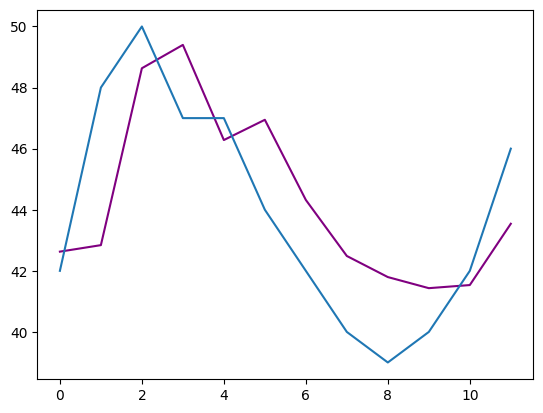

In [18]:
plt.plot(pred1[-12:], color='purple')
plt.plot(Y_test.values[-12:])

# This model has performed pretty well

--> 2.) Model2: RandomForestRegressor

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
model2 = RandomForestRegressor()
model2.fit(X_train, Y_train)

RandomForestRegressor()

In [21]:
pred2 = model2.predict(X_test)

pred2

array([49.8 , 52.86, 50.06, 50.73, 51.88, 50.59, 48.03, 48.28, 50.1 ,
       50.24, 48.73, 49.36, 46.15, 45.27, 46.48, 47.89, 49.67, 49.99,
       47.58, 46.25, 45.74, 48.21, 50.39, 50.86, 52.89, 47.6 , 47.78,
       51.34, 51.7 , 49.47, 49.2 , 49.  , 52.6 , 51.24, 51.45, 50.19,
       49.13, 49.43, 50.7 , 53.3 , 51.28, 48.53, 49.36, 49.57, 47.61,
       49.24, 50.31, 52.26, 54.03, 53.47, 47.36, 51.42, 48.94, 48.91,
       50.43, 50.24, 47.04, 48.65, 47.68, 48.15, 48.82, 48.86, 49.5 ,
       48.85, 47.54, 47.05, 50.59, 50.04, 45.79, 45.49, 46.59, 48.16,
       48.17, 45.42, 48.44, 49.1 , 48.79, 48.52, 49.04, 45.48, 45.34,
       45.59, 48.29, 48.45, 49.96, 47.57, 45.22, 45.88, 48.18, 48.68,
       49.53, 47.52, 48.92, 48.42, 49.46, 52.23, 52.12, 49.68, 48.28,
       47.86, 48.1 , 50.55, 52.11, 51.32, 50.25, 48.18, 49.53, 49.94,
       48.38, 46.14, 48.27, 48.12, 46.84, 46.27, 46.71, 47.14, 49.04,
       48.61, 45.75, 48.78, 46.63, 43.18, 44.95, 45.35, 43.6 , 44.65,
       44.68, 47.73,

In [22]:
mse2 = mean_squared_error(Y_test, pred2)
rmse2 = sqrt(mse2)

print(mse2, rmse2)

4.596204046242773 2.1438759400307594


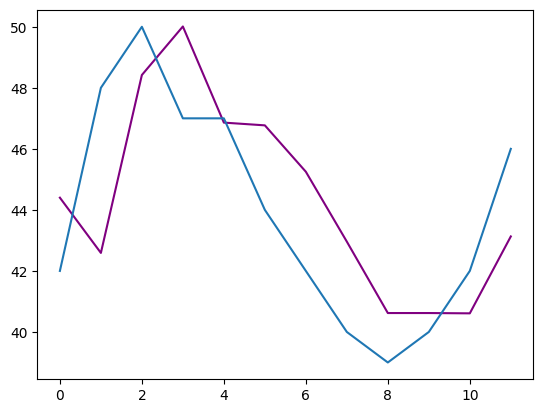

In [23]:
plt.plot(pred2[-12:],color='purple')
plt.plot(Y_test.iloc[-12:].values)

# Slightly poor than LinearRegression

--> 3.) Model3: GradientBoostingRegressor

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

model3 = GradientBoostingRegressor(n_estimators=100, random_state=42)
model3.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=42)

In [25]:
pred3 = model3.predict(X_test)

pred3

array([50.22545813, 52.439277  , 50.79830006, 51.20667664, 51.90035575,
       50.22132436, 48.32399385, 48.4834241 , 49.41393571, 49.93303944,
       47.66924621, 49.71499599, 46.33823784, 45.32410156, 46.5824551 ,
       47.67283774, 50.08726517, 50.13617908, 47.49441516, 47.00587584,
       44.91627535, 48.42062225, 50.74375547, 50.49206638, 52.14881781,
       47.94438854, 47.34961207, 51.04515854, 51.78173419, 49.65070432,
       49.65415494, 49.34811547, 51.9308128 , 51.66292774, 51.40612878,
       50.00929083, 49.25310773, 49.48351767, 50.00859492, 52.40703144,
       51.54360964, 48.63543501, 49.57055785, 49.77346492, 47.6421687 ,
       48.83490964, 50.22209849, 52.75604395, 53.00705479, 52.68900277,
       47.48845402, 52.0406636 , 49.32341032, 48.78044708, 49.89497837,
       49.77391789, 47.52724199, 48.71854404, 48.18283211, 48.22207439,
       50.19300133, 49.4366645 , 49.31178815, 49.58156759, 47.50704891,
       46.95966567, 50.03935276, 50.0844351 , 46.69070775, 46.44

In [26]:
mse3 = mean_squared_error(Y_test, pred3)
rmse3 = sqrt(mse3)

print(mse3, rmse3)

4.370219674770322 2.0905070377232224


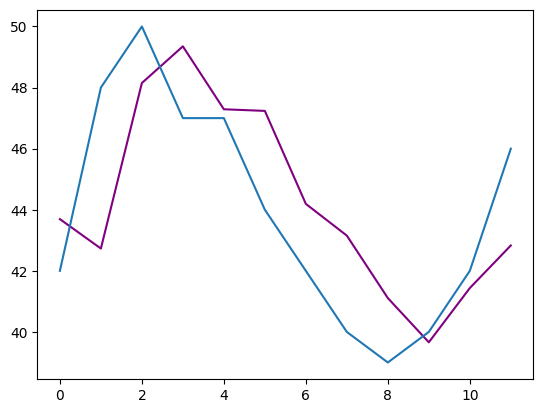

In [27]:
plt.plot(pred3[-12:], color='purple')
plt.plot(Y_test.values[-12:])

--> 4.) Model4: XGBRegressor

In [28]:
from xgboost import XGBRegressor

model4 = XGBRegressor(n_estimators=100, random_state=42, learning_rate=0.1)
model4.fit(X_train, Y_train)

C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [29]:
pred4 = model4.predict(X_test)

pred4

array([49.882687, 52.206753, 50.825737, 51.120384, 52.380253, 50.586105,
       48.170673, 48.476585, 49.650066, 50.56848 , 48.36483 , 49.952206,
       46.026722, 45.317944, 45.696228, 47.635014, 49.475548, 50.88247 ,
       48.85512 , 46.77535 , 45.48103 , 49.542645, 50.561497, 51.041023,
       52.725613, 48.239243, 46.988922, 50.881474, 51.12096 , 49.144096,
       49.762596, 50.07805 , 52.72569 , 51.291237, 50.828228, 50.179314,
       48.976055, 49.25437 , 51.227787, 54.201256, 51.079895, 48.768234,
       49.53206 , 49.992683, 47.77615 , 49.095432, 51.060314, 52.619427,
       53.43658 , 53.421   , 47.050613, 52.714203, 50.18716 , 49.02427 ,
       50.089077, 49.989517, 46.2881  , 49.46657 , 48.255737, 49.01226 ,
       48.297203, 49.068726, 48.63878 , 48.22707 , 46.859184, 47.660294,
       50.736202, 50.53279 , 45.83338 , 45.990723, 46.95931 , 47.976955,
       47.76476 , 46.721004, 48.111637, 48.306877, 49.524563, 48.4813  ,
       48.835903, 45.988758, 46.004887, 45.94566 , 

In [30]:
mse4 = mean_squared_error(Y_test, pred4)
rmse4 = sqrt(mse4)
print(mse4, rmse4)

4.751415693315689 2.1797742298953096


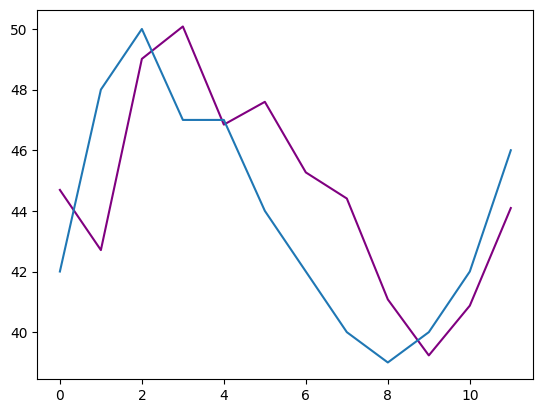

In [31]:
plt.plot(pred4[-12:], color='purple')
plt.plot(Y_test.values[-12:])

--> 5.) Model5: Lasso()

In [32]:
from sklearn.linear_model import Lasso

In [33]:
model5 = Lasso()
model5.fit(X_train, Y_train)

Lasso()

In [34]:
pred5 = model5.predict(X_test)

pred5

array([49.96240724, 51.45356298, 50.68178548, 50.54974672, 51.53861383,
       50.07241901, 48.64499451, 48.71552389, 49.42818835, 50.12016473,
       47.25459954, 49.38914379, 46.36923644, 44.89217456, 46.46431891,
       47.226915  , 49.96088439, 50.10777287, 47.01139015, 46.18805167,
       44.06659578, 47.03269648, 50.08273355, 50.07572343, 51.38779268,
       48.42805826, 47.54005069, 50.66673782, 51.50998315, 50.03308349,
       49.39520068, 49.25827387, 51.46749923, 52.368264  , 51.66122018,
       50.08132677, 49.26009388, 49.33317719, 50.24555161, 51.74318857,
       51.72275841, 48.66518927, 49.35213291, 49.40281712, 47.26182029,
       48.77855924, 50.22627188, 52.9698503 , 53.77442349, 53.07072116,
       48.54610505, 50.76820275, 48.66725294, 48.84813347, 49.62062416,
       49.61686214, 47.173107  , 47.99604803, 47.16164339, 47.14966781,
       50.04322006, 49.35983586, 49.23116723, 49.30963899, 47.09900626,
       46.35166154, 49.35721003, 49.3662081 , 46.40105122, 46.39

In [35]:
mse5 = mean_squared_error(Y_test, pred5)
rmse5 = sqrt(mse5)

print(mse5, rmse5)

4.2973889397429765 2.073014457195843


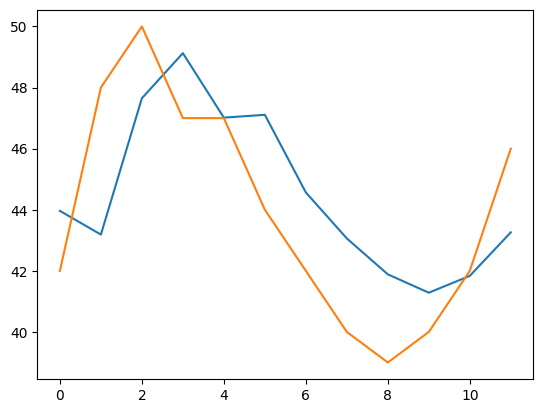

In [36]:
plt.plot(pred5[-12:])
plt.plot(Y_test.values[-12:])

--> 6. Model6: Ridge

In [37]:
from sklearn.linear_model import Ridge

In [38]:
model6 = Ridge()
model6.fit(X_train, Y_train)

Ridge()

In [39]:
pred6 = model6.predict(X_test)

pred6

array([50.26741916, 52.12847425, 50.78864317, 50.71503602, 52.10284004,
       50.34146094, 48.31027489, 49.11764479, 50.12072791, 50.3135945 ,
       47.04309942, 50.31002724, 46.03265583, 44.78712166, 47.27026157,
       47.72657951, 50.54216254, 50.45960202, 46.80419101, 46.03429338,
       44.13032097, 48.18157378, 50.66945485, 50.2603702 , 51.86401599,
       47.84376165, 47.54234264, 51.41980509, 52.04791677, 49.86535159,
       49.22517625, 49.64730152, 52.03430444, 52.67562396, 51.96622136,
       49.89186022, 49.43019746, 50.01239681, 50.68522888, 52.25404796,
       52.24738864, 48.47087492, 49.76455933, 50.18470856, 47.42829885,
       49.3641821 , 51.07790661, 53.88383026, 54.24191969, 53.4582046 ,
       48.06059002, 51.39032566, 49.38278242, 49.28387243, 50.06354408,
       50.41253507, 47.17517796, 48.29784076, 47.86988552, 47.55476926,
       50.77214106, 49.94534936, 49.23335853, 49.46429026, 47.46838987,
       46.29894606, 50.17515362, 50.21541647, 46.02790384, 46.38

In [40]:
mse6 = mean_squared_error(Y_test, pred6)
rmse6 = sqrt(mse6)
print(mse6, rmse6)

4.2289750116794185 2.0564471818355603


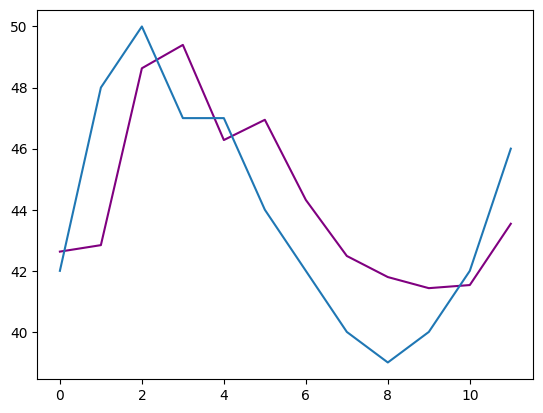

In [41]:
plt.plot(pred6[-12:], color='purple')
plt.plot(Y_test.values[-12:])

--> LinearRegression = Ridge = Best